In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/alxmamaev/flowers-recognition'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: khanaabidabdal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition


100%|██████████| 225M/225M [00:07<00:00, 31.7MB/s]


In [5]:
data_dir="/content/flowers-recognition/flowers"

In [6]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
walk_through_dir(data_dir)

There are 5 directories and 0 images in '/content/flowers-recognition/flowers'.
There are 0 directories and 733 images in '/content/flowers-recognition/flowers/sunflower'.
There are 0 directories and 984 images in '/content/flowers-recognition/flowers/tulip'.
There are 0 directories and 764 images in '/content/flowers-recognition/flowers/daisy'.
There are 0 directories and 1052 images in '/content/flowers-recognition/flowers/dandelion'.
There are 0 directories and 784 images in '/content/flowers-recognition/flowers/rose'.


In [8]:
import os
from pathlib import Path

# Define the train directory as a Path object
data_dir = Path('/content/flowers-recognition/flowers')


def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# Walk through the train directory
walk_through_dir(data_dir)

import random
from PIL import Image

# Set seed
random.seed(2) # <- try changing this and see what happens

import random

# Get all image paths
image_path_list = list(data_dir.glob("**/*.jpg"))

# Get a random index
random_index = random.randint(0, len(image_path_list) - 1)

# Get the image at the random index
random_image_path = image_path_list[random_index]

# 4. Open image
img = Image.open(random_image_path)


There are 5 directories and 0 images in '/content/flowers-recognition/flowers'.
There are 0 directories and 733 images in '/content/flowers-recognition/flowers/sunflower'.
There are 0 directories and 984 images in '/content/flowers-recognition/flowers/tulip'.
There are 0 directories and 764 images in '/content/flowers-recognition/flowers/daisy'.
There are 0 directories and 1052 images in '/content/flowers-recognition/flowers/dandelion'.
There are 0 directories and 784 images in '/content/flowers-recognition/flowers/rose'.


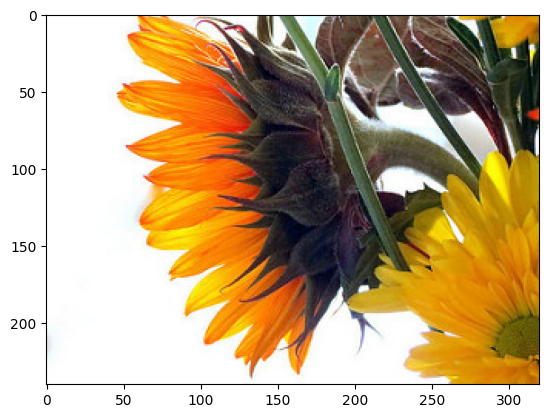

In [9]:
plt.imshow(img);

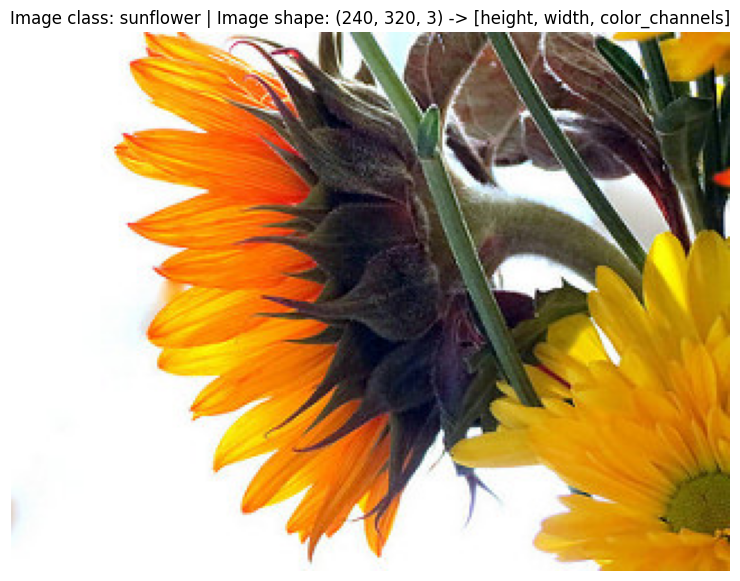

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)
image_class = random_image_path.parent.stem

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [11]:
!pip install split-folders

In [12]:
import splitfolders
splitfolders.ratio(input=data_dir, output='Images', seed=101, ratio=(0.8, 0.2))


Copying files: 4317 files [00:00, 4969.30 files/s]


In [13]:
Images_path='/content/Images'

In [14]:
weights=torchvision.models.EfficientNet_B0_Weights.DEFAULT
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [15]:
auto_transforms=weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [16]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=os.path.join(Images_path,'train'), # target folder of images
                                  transform=auto_transforms, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(os.path.join(Images_path,'val'),
                                 transform=auto_transforms)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 3452
    Root location: /content/Images/train
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[256]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BICUBIC
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 865
    Root location: /content/Images/val
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[256]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BICUBIC
           )


In [17]:
class_names = train_data.classes
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [18]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ab7400a2fe0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ab7400a0af0>)

In [19]:
weights=torchvision.models.EfficientNet_B0_Weights.DEFAULT
model=torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 37.0MB/s]


In [20]:
!pip install -q torchinfo
from torchinfo import summary

In [21]:
summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [22]:
for param in model.features.parameters():
    param.requires_grad = False

In [23]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [24]:

summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 5]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

In [25]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [26]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [27]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [28]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
results = train(model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7788 | train_acc: 0.7770 | test_loss: 0.4982 | test_acc: 0.8594
Epoch: 2 | train_loss: 0.4639 | train_acc: 0.8571 | test_loss: 0.4006 | test_acc: 0.8839
Epoch: 3 | train_loss: 0.3857 | train_acc: 0.8735 | test_loss: 0.3644 | test_acc: 0.8817
Epoch: 4 | train_loss: 0.3482 | train_acc: 0.8823 | test_loss: 0.3496 | test_acc: 0.8951
Epoch: 5 | train_loss: 0.3309 | train_acc: 0.8919 | test_loss: 0.3366 | test_acc: 0.8906
Epoch: 6 | train_loss: 0.3124 | train_acc: 0.8965 | test_loss: 0.3189 | test_acc: 0.8917
Epoch: 7 | train_loss: 0.2902 | train_acc: 0.8977 | test_loss: 0.3072 | test_acc: 0.9051
Epoch: 8 | train_loss: 0.2811 | train_acc: 0.9023 | test_loss: 0.3049 | test_acc: 0.8996
Epoch: 9 | train_loss: 0.2725 | train_acc: 0.9052 | test_loss: 0.3003 | test_acc: 0.9007
Epoch: 10 | train_loss: 0.2587 | train_acc: 0.9129 | test_loss: 0.2965 | test_acc: 0.8940
Total training time: 288.858 seconds


In [29]:
import typing
from typing import Dict, List

In [30]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

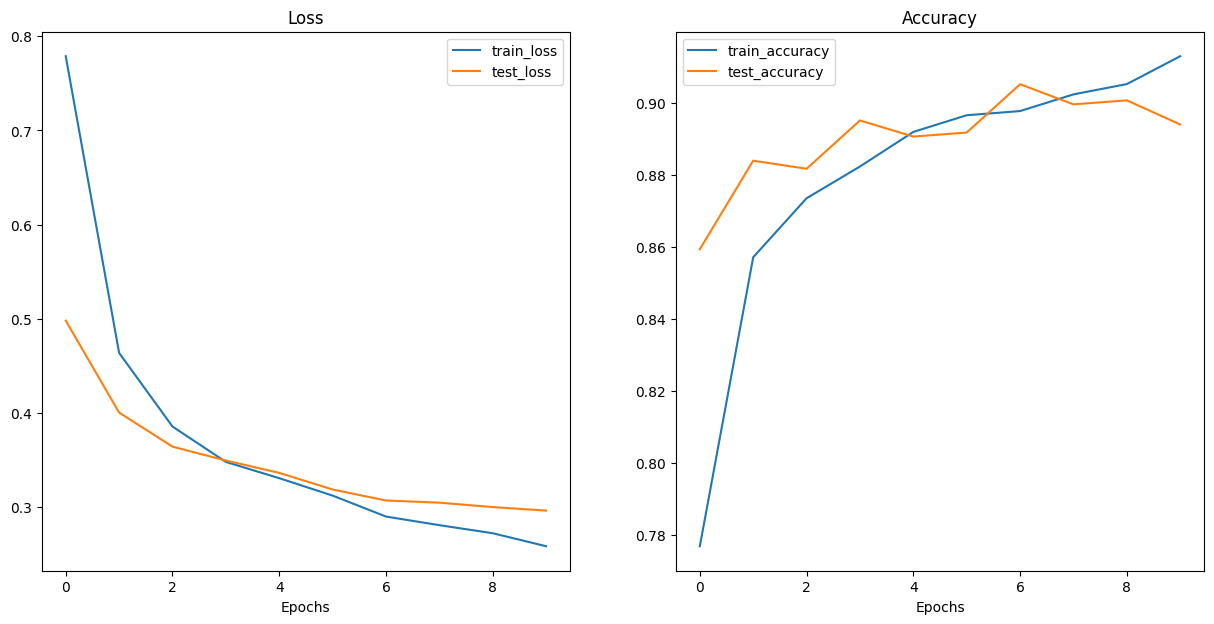

In [31]:
plot_loss_curves(results)

In [32]:
custom_image_path='/content/sunflower.jpeg'

In [33]:
import torchvision

custom_image_uint8=torchvision.io.read_image(str(custom_image_path))

print(f"Custom image tensor:\n{custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image datatype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[ 84,  83,  81,  ...,  10,  15,  15],
         [ 95,  92,  90,  ...,  14,  13,  16],
         [ 83,  82,  85,  ...,  21,  25,  24],
         ...,
         [ 81,  82,  69,  ..., 221, 249, 252],
         [ 97,  84,  62,  ..., 241, 248, 247],
         [101,  81,  61,  ..., 244, 245, 240]],

        [[111, 110, 108,  ...,  31,  35,  35],
         [122, 121, 117,  ...,  35,  33,  36],
         [112, 113, 114,  ...,  42,  46,  45],
         ...,
         [ 92,  93,  80,  ..., 179, 200, 200],
         [108,  95,  73,  ..., 200, 203, 198],
         [111,  91,  72,  ..., 208, 204, 196]],

        [[ 68,  67,  65,  ...,  16,  24,  24],
         [ 79,  77,  74,  ...,  20,  21,  24],
         [ 68,  69,  70,  ...,  23,  29,  30],
         ...,
         [ 60,  61,  48,  ...,  35,  46,  39],
         [ 76,  63,  39,  ...,  50,  42,  33],
         [ 77,  57,  38,  ...,  50,  38,  25]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 237, 212])

Custom image dataty

In [34]:
custom_image=torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

custom_image=custom_image/255

print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.3294, 0.3255, 0.3176,  ..., 0.0392, 0.0588, 0.0588],
         [0.3725, 0.3608, 0.3529,  ..., 0.0549, 0.0510, 0.0627],
         [0.3255, 0.3216, 0.3333,  ..., 0.0824, 0.0980, 0.0941],
         ...,
         [0.3176, 0.3216, 0.2706,  ..., 0.8667, 0.9765, 0.9882],
         [0.3804, 0.3294, 0.2431,  ..., 0.9451, 0.9725, 0.9686],
         [0.3961, 0.3176, 0.2392,  ..., 0.9569, 0.9608, 0.9412]],

        [[0.4353, 0.4314, 0.4235,  ..., 0.1216, 0.1373, 0.1373],
         [0.4784, 0.4745, 0.4588,  ..., 0.1373, 0.1294, 0.1412],
         [0.4392, 0.4431, 0.4471,  ..., 0.1647, 0.1804, 0.1765],
         ...,
         [0.3608, 0.3647, 0.3137,  ..., 0.7020, 0.7843, 0.7843],
         [0.4235, 0.3725, 0.2863,  ..., 0.7843, 0.7961, 0.7765],
         [0.4353, 0.3569, 0.2824,  ..., 0.8157, 0.8000, 0.7686]],

        [[0.2667, 0.2627, 0.2549,  ..., 0.0627, 0.0941, 0.0941],
         [0.3098, 0.3020, 0.2902,  ..., 0.0784, 0.0824, 0.0941],
         [0.2667, 0.2706, 0.2745,  ..

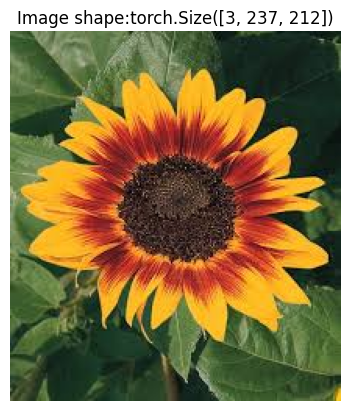

In [35]:
plt.imshow(custom_image.permute(1,2,0))
plt.title(f"Image shape:{custom_image.shape}")
plt.axis(False);

In [36]:
custom_image_transform=transforms.Compose([
    transforms.Resize((64,64))
])

custom_image_transformed=custom_image_transform(custom_image)

print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 237, 212])
New shape: torch.Size([3, 64, 64])


In [37]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

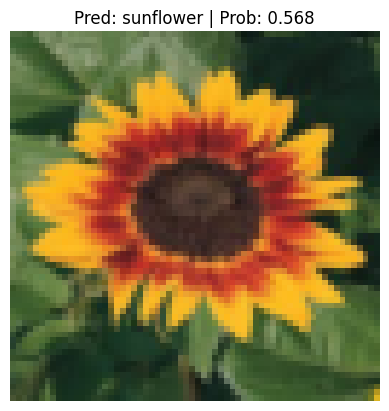

In [38]:
# Pred on our custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

In [39]:
try:
  import gradio as gd
except:
  !pip install gradio
  import gradio as gr

print(f"Gradio version:{gr.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 108.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.8 MB

In [40]:
model.to('cpu')

next(iter(model.parameters())).device

device(type='cpu')

In [41]:
from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = auto_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    model.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(model(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

In [42]:
test_dir='/content/Images/val'

In [43]:
import random
from PIL import Image

# Get a list of all test image filepaths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))

# Randomly select a test image path
random_image_path = random.sample(test_data_paths, k=1)[0]

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(img=image)
print(f"Prediction label and probability dictionary: \n{pred_dict}")
print(f"Prediction time: {pred_time} seconds")

[INFO] Predicting on image at path: /content/Images/val/rose/5002458392_f465ed905e_n.jpg

Prediction label and probability dictionary: 
{'daisy': 0.12825588881969452, 'dandelion': 0.02192307822406292, 'rose': 0.7976066470146179, 'sunflower': 0.0029972968623042107, 'tulip': 0.049217112362384796}
Prediction time: 0.23287 seconds


In [44]:
# Create a list of example inputs to our Gradio demo
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=3)]
example_list

[['/content/Images/val/sunflower/1244774242_25a20d99a9.jpg'],
 ['/content/Images/val/sunflower/9400904374_37723396e3_n.jpg'],
 ['/content/Images/val/sunflower/8929213942_5544191250_n.jpg']]

In [45]:
import gradio as gr

# Create title, description and article strings
title = "Flowers Classification"
description = "An EfficientNetB0 feature extractor computer vision model to classify images of flowers such as 'Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip'."
article = "Created at [Flower Classification]."

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://173d46c3e6b1bc5a16.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [46]:
import shutil
from pathlib import Path

flower_classification_demo_path=Path('demos/flower_classification/')

if flower_classification_demo_path.exists():
  shutil.rmtree(flower_classification_demo_path)
  flower_classification_demo_path.mkdir(parents=True,
                                        exist_ok=True)
else:
  flower_classification_demo_path.mkdir(parents=True,
                                        exist_ok=True)


!ls demos/flower_classification/

In [47]:
import shutil
from pathlib import Path

# 1. Create an examples directory
flower_classification_examples_path = flower_classification_demo_path / "examples"
flower_classification_examples_path.mkdir(parents=True, exist_ok=True)

# 2. Collect three random test dataset image paths
flower_classification_examples = [Path('/content/Images/val/rose/8524505682_bda885af3a_n.jpg'),
                            Path('/content/Images/val/daisy/754296579_30a9ae018c_n.jpg'),
                            Path('/content/Images/val/tulip/20435554843_ba6862f923_n.jpg')]

# 3. Copy the three random images to the examples directory
for example in flower_classification_examples:
    destination = flower_classification_examples_path / example.name
    print(f"[INFO] Copying {example} to {destination}")
    shutil.copy2(src=example, dst=destination)

[INFO] Copying /content/Images/val/rose/8524505682_bda885af3a_n.jpg to demos/flower_classification/examples/8524505682_bda885af3a_n.jpg
[INFO] Copying /content/Images/val/daisy/754296579_30a9ae018c_n.jpg to demos/flower_classification/examples/754296579_30a9ae018c_n.jpg
[INFO] Copying /content/Images/val/tulip/20435554843_ba6862f923_n.jpg to demos/flower_classification/examples/20435554843_ba6862f923_n.jpg


In [48]:
import os

# Get example filepaths in a list of lists
example_list = [["examples/" + example] for example in os.listdir(flower_classification_examples_path)]
example_list


[['examples/754296579_30a9ae018c_n.jpg'],
 ['examples/8524505682_bda885af3a_n.jpg'],
 ['examples/20435554843_ba6862f923_n.jpg']]

In [49]:
from pathlib import Path

Model_Path=Path('models')
Model_Path.mkdir(parents=True,
                 exist_ok=True)

Model_Name='Efficient_Model.pth'
Model_Save_Path=Model_Path/Model_Name

print(f"Saving model to :{Model_Save_Path}")
torch.save(obj=model.state_dict(),
           f=Model_Save_Path)

Saving model to :models/Efficient_Model.pth


In [50]:
import shutil

# Create a source path for our target model
model_flower_classification_model_path = "/models/Efficient_Model.pth"

# Create a destination path for our target model
model_flower_classification_mini_model_destination = flower_classification_demo_path / model_flower_classification_model_path.split("/")[1]

# Try to move the file
try:
    print(f"[INFO] Attempting to move {model_flower_classification_model_path} to {model_flower_classification_mini_model_destination}")

    # Move the model
    shutil.move(src=model_flower_classification_model_path,
                dst=model_flower_classification_mini_model_destination)

    print(f"[INFO] Model move complete.")

# If the model has already been moved, check if it exists
except:
    print(f"[INFO] No model found at {model_flower_classification_model_path}, perhaps its already been moved?")
    print(f"[INFO] Model exists at {model_flower_classification_mini_model_destination}: {model_flower_classification_mini_model_destination.exists()}")

[INFO] Attempting to move /models/Efficient_Model.pth to demos/flower_classification/models
[INFO] No model found at /models/Efficient_Model.pth, perhaps its already been moved?
[INFO] Model exists at demos/flower_classification/models: False


In [51]:
%%writefile demos/flower_classification/model.py
import torch
import torchvision

from torch import nn

def create_model(num_classes:int=5,
                 seed:int=42):
  weights=torchvision.models.EfficientNet_B0_Weights.DEFAULT
  transforms=weights.transforms()
  model=torchvision.models.efficientnet_b0(weights=weights)

  for param in model.parameters():
    param.requires_grad=False

  torch.manual_seed(42)
  model.classifier=nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=num_classes, # same number of output units as our number of classes
                    bias=True))

  return model,transforms


Writing demos/flower_classification/model.py


In [52]:
%%writefile demos/flower_classification/app.py
import gradio as gr
import os
import torch

from model import create_model
from timeit import default_timer as timer
from typing import Tuple, Dict

# Setup class names
class_names = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

### 2. Model and transforms preparation ###

# Create model
model, model_transforms = create_model(
    num_classes=5,
)

# Load saved weights
model.load_state_dict(
    torch.load(
        f="Efficient_Model.pth",
        map_location=torch.device("cpu"),  # load to CPU
    )
)

### 3. Predict function ###

# Create predict function
def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = model_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    model.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(model(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

### 4. Gradio app ###

# Create title, description and article strings
title = "Flower Classification"
description = "An EfficientNetB0 feature extractor computer vision model to classify images of flower as 'daisy', 'dandelion', 'rose', 'sunflower' and 'tulip'."
article = "Created at [Flower Classification]"

# Create examples list from "examples/" directory
example_list = [["examples/" + example] for example in os.listdir("examples")]

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=5, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    # Create examples list from "examples/" directory
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch()

Writing demos/flower_classification/app.py


In [53]:
%%writefile demos/flower_classification/requirements.txt
torch==2.3.0
torchvision==0.18.0
gradio==4.32.2

Writing demos/flower_classification/requirements.txt


In [54]:
!ls demos/flower_classification

app.py	examples  model.py  requirements.txt


In [55]:
# Change into and then zip the foodvision_mini folder but exclude certain files
!cd demos/flower_classification && zip -r ../flower_classification.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

# Download the zipped FoodVision Mini app (if running in Google Colab)
try:
    from google.colab import files
    files.download("demos/flower_classification.zip")
except:
    print("Not running in Google Colab, can't use google.colab.files.download(), please manually download.")

  adding: app.py (deflated 58%)
  adding: examples/ (stored 0%)
  adding: examples/754296579_30a9ae018c_n.jpg (deflated 2%)
  adding: examples/8524505682_bda885af3a_n.jpg (deflated 3%)
  adding: examples/20435554843_ba6862f923_n.jpg (deflated 0%)
  adding: model.py (deflated 49%)
  adding: requirements.txt (deflated 4%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
print(torch.__version__)

2.3.0+cu121


In [57]:
print(torchvision.__version__)

0.18.0+cu121


In [58]:
print(gr.__version__)

4.36.0
